# Homework Week 5
## Question 1: Effect of Random Noise

Note: I would not recommend running much more than 1,000 simulations unless you are willing to wait a few minutes. This is assuming your computer is about as fast as my laptop.

number of simulations? 10000


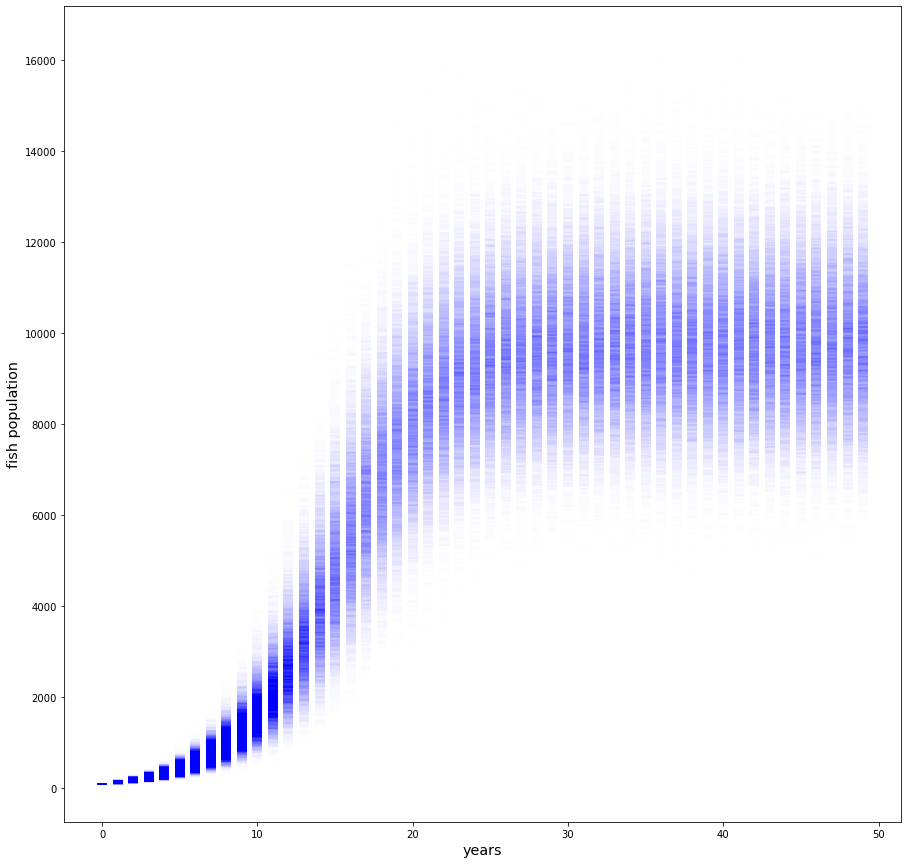

CPU times: user 2min, sys: 2.32 s, total: 2min 3s
Wall time: 2min 7s


In [5]:
%%time

import numpy as np
import matplotlib.pyplot as plt

def x_next_ricker(K,r_0,Gamma,x):                # calculates the next element (population)
    return Gamma()*x*e**(r_0 * (1 - x/K))

e         = 2.71828182845904523536
last_year = 50
num_sims  = int(input("number of simulations?"))
K         = 10000                                # carrying capacity
r_0       = 0.3                                  # intrinsic growth rate
Gamma     = lambda: np.random.normal(1,0.1)      # random noise function
x_0       = 100                                  # starting population

plt.figure(figsize = [15,15])
years = range(0,last_year)

for graph in range(0,num_sims):                         # make several graphs
    X = [x_0]
    for x in range(0,last_year-1):                      # calculate each sequence, store the elements
        X.append(x_next_ricker(K, r_0,Gamma, X[x]))
    plt.scatter(years, X, 120, marker = '_', alpha = min([20/num_sims,1]), color='b')      # plot

plt.xlabel("years",size='x-large')
plt.ylabel("fish population",size='x-large')
plt.show()

## Question 2:
After 5 years what range of fish would you expect to have if you started with

 - 10 fish
 - 100 fish
 - 500 fish
 - 1,000 fish

Since the mean is 1 and the standard deviation is 0.1, 99.7% of all Γ values should fall between 0.7 and 1.3. Within 3 standard deviations, the "worst luck" you can get is Γ = 0.7, and the "best luck" you can get is Γ = 1.3. I'm defining "expected range" to be the populations of the luckiest and the unluckiest fish. Of course, the chance of Γ remaining at +- 3 standard deviations reduces exponentially each year. So, it's extremely unlikely for the fish populations to actually come anywhere close to those upper and lower bounds. Fortunately, this also means that we know with almost complete certainty that the fish populations will be in those ranges. If you wanted a narrower range but less certainty, you could simply adjust the number of standard deviations that is considered lucky or unlucky.

In [32]:
def expectedFish(mean, stdev, starting_population, num_years, num_stdevs=3):
    # max standard deviations below the mean, fish are very infertile
    Bad_luck = lambda: mean - stdev * num_stdevs
    # max standard deviations above the mean, fish are very fertile
    Good_luck = lambda: mean + stdev * num_stdevs

    X_bad  = [starting_population]
    X_good = [starting_population]
    
    for x in range(0,num_years):
        X_bad.append(x_next_ricker(K, r_0, Bad_luck, X_bad[x]))
        X_good.append(x_next_ricker(K, r_0, Good_luck, X_good[x]))
    
    to_format = "Expected population after {} years for starting population of {}: [{},{}], or about {} to {} fish"
    print(to_format.format(num_years,starting_population,X_bad[-1],X_good[-1],round(X_bad[-1]),round(X_good[-1])))

num_stdevs = input("Number of standard deviations (default is 3):")

if num_stdevs == "": num_stdevs = 3
else: num_stdevs = float(num_stdevs)

expectedFish(1,0.1,10,5,num_stdevs)
expectedFish(1,0.1,100,5,num_stdevs)
expectedFish(1,0.1,500,5,num_stdevs)
expectedFish(1,0.1,1000,5,num_stdevs)

Number of standard deviations (default is 3): 2


Expected population after 5 years for starting population of 10: [14.65979900952055,110.97311576567168], or about 15 to 111 fish
Expected population after 5 years for starting population of 100: [144.31220083589213,1062.6181912798377], or about 144 to 1063 fish
Expected population after 5 years for starting population of 500: [674.4318790198406,4448.098977967749], or about 674 to 4448 fish
Expected population after 5 years for starting population of 1000: [1245.6962578809225,7334.203782267994], or about 1246 to 7334 fish


# Question 3
After 30 years, do you expect a larger distribution with higher growth rate or lower growth rate? (With r_0 between 0 and 1)

number of simulations (per r_0 value)? 1000


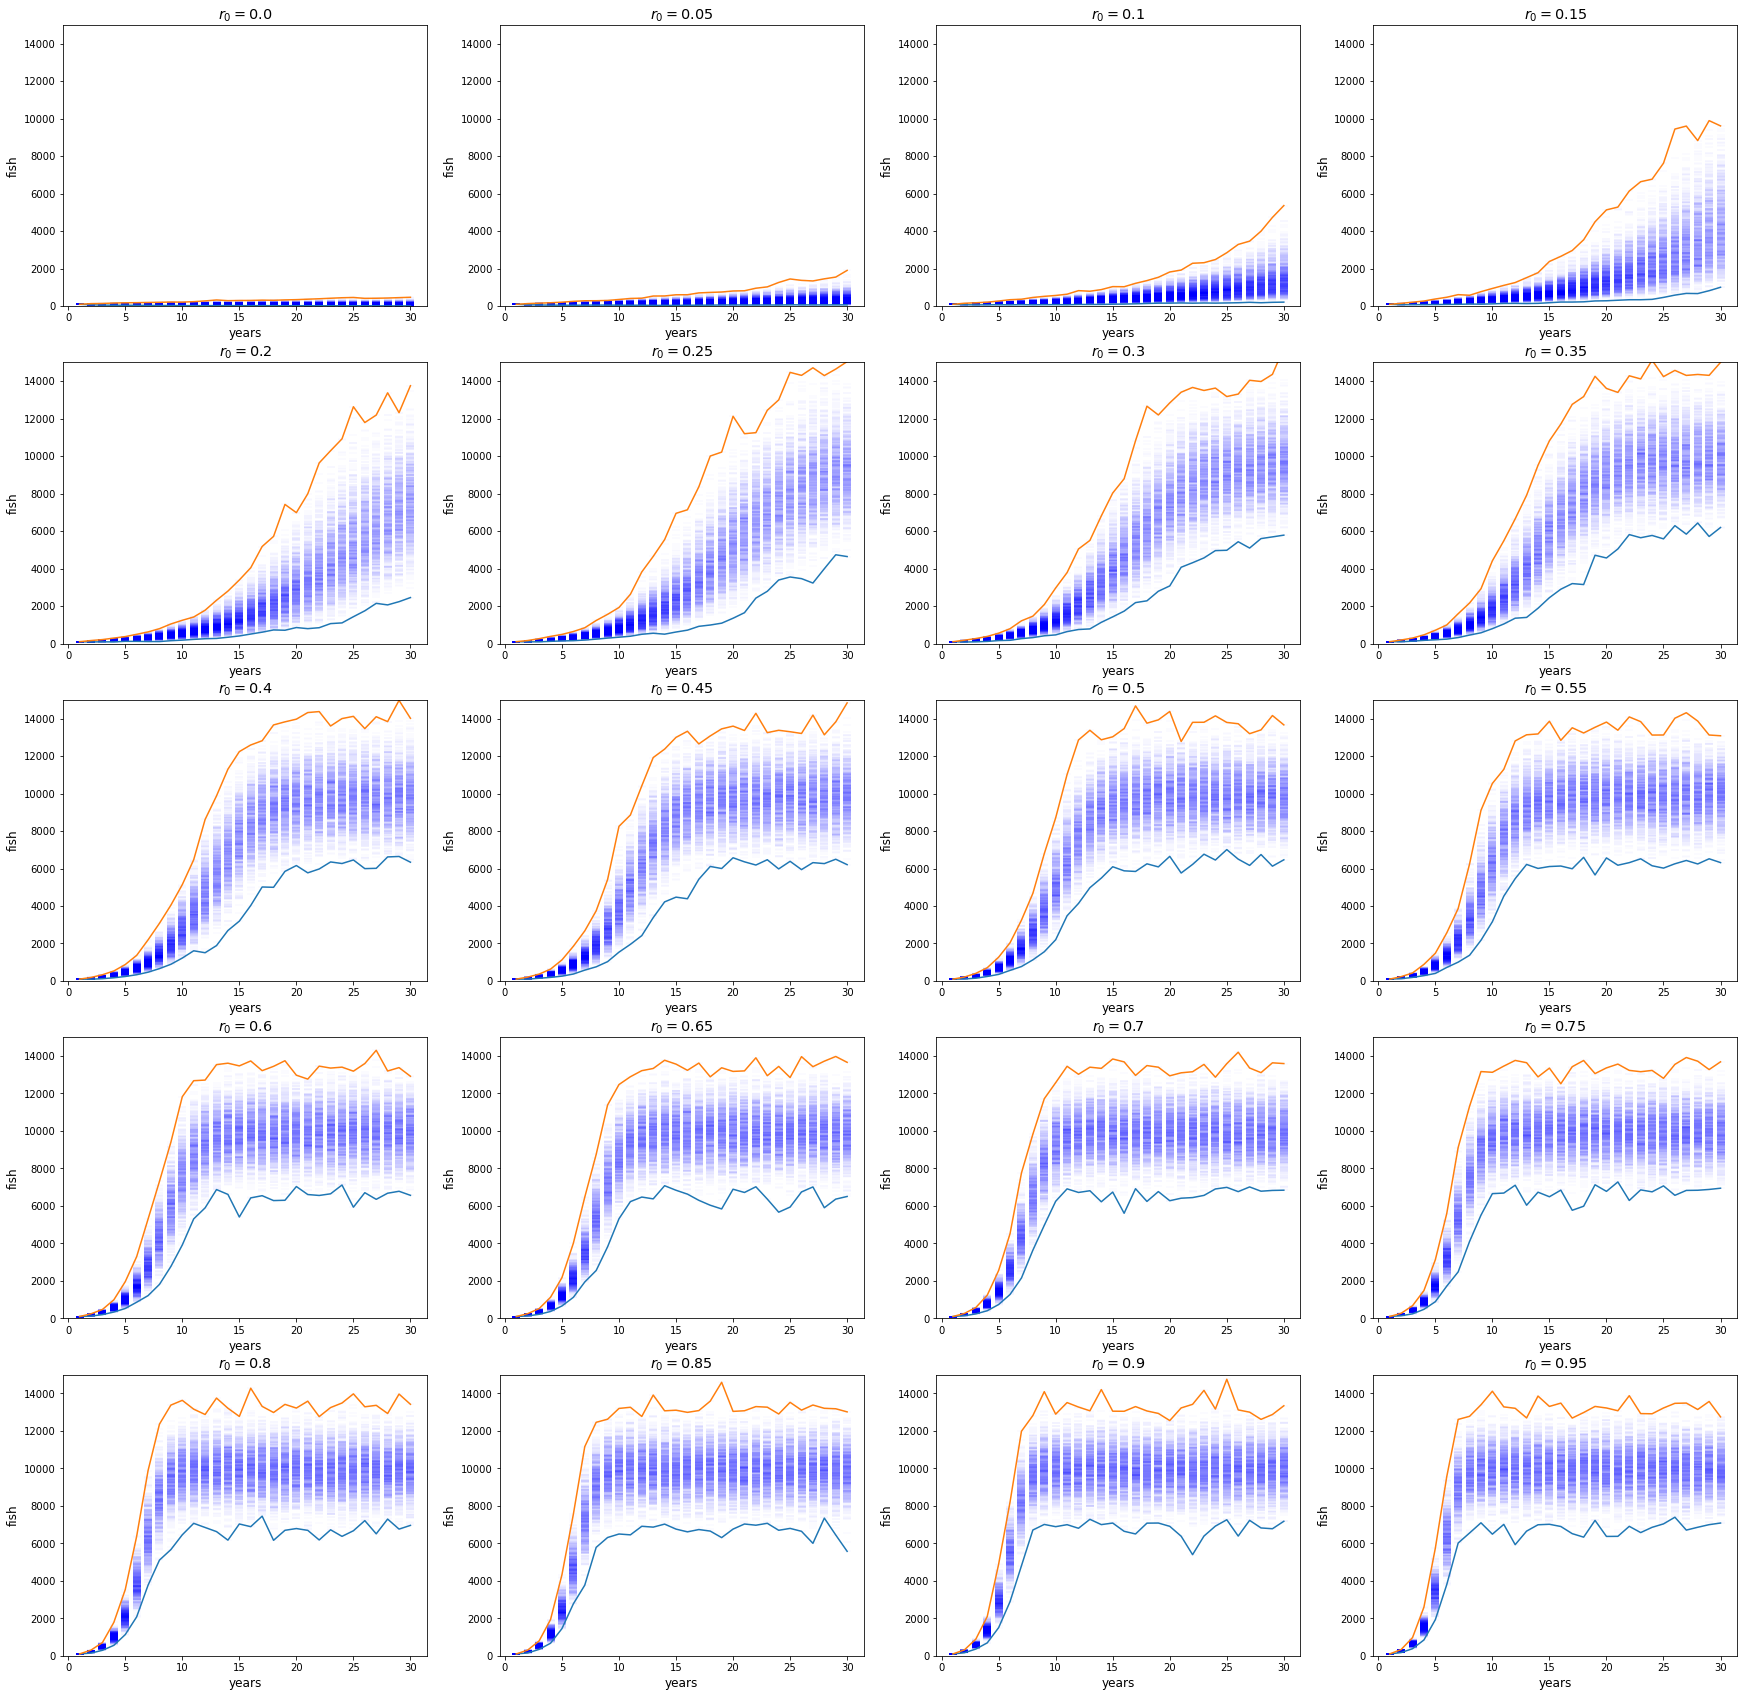

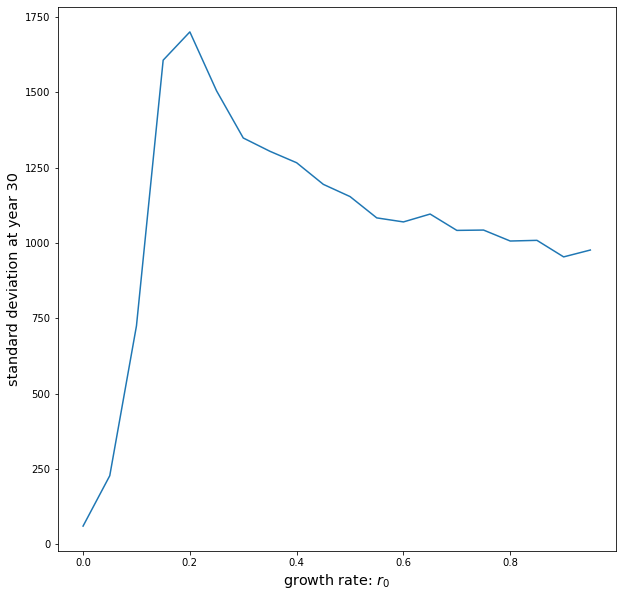

CPU times: user 58.8 s, sys: 206 ms, total: 59 s
Wall time: 1min 7s


In [146]:
%%time

last_year = 30
num_sims  = int(input("number of simulations (per r_0 value)?"))
r_0_list  = np.arange(0,1,0.05)

# there are a lot of loops to keep track of!
# there will be a graph for each r_0 value, representing several sequences (from the ricker's equation)
# in each graph there will be two line plots for min and max, and several smaller scatter plots for each sequence

years = range(1,last_year+1)

# standard deviations at year 30
stdevs_30 = []

fig, axes = plt.subplots(nrows=4, ncols=3)
#fig.tight_layout()
fig.set_figheight(30)
fig.set_figwidth(30)

graph_index = 1
for r_0 in r_0_list:
    sequences = [[x_0] for i in range(0,num_sims)]
    #plt.figure()
    plt.subplot(5,4,graph_index)
    for seq in sequences:
        # build each sequence
        for x in range(0,last_year-1):
            seq.append(x_next_ricker(K, r_0, Gamma, seq[x]))
        plt.scatter(years, seq, 50, marker = '_', color = 'b', alpha = min([20/num_sims,1]))
    # for each year, find the lowest/highest generated value
    x_mins_per_year = []
    x_maxs_per_year = []
    for year in range(0,last_year):
        x_vals_this_year = []
        for seq in sequences:
            x_vals_this_year.append(seq[year])
        x_mins_per_year.append(min(x_vals_this_year))
        x_maxs_per_year.append(max(x_vals_this_year))
        # get the mean and standard deviation for year 30
        if year == 29:
            stdevs_30.append(np.std(x_vals_this_year))
            
    # plot the results of each experiment
    plt.title(r'$r_0 = $'+str(round(r_0,2)),size="x-large")
    plt.xlabel("years",size="large")
    plt.ylabel("fish",size="large")
    plt.ylim(0,K*1.5)
    plt.plot(years,x_mins_per_year)
    plt.plot(years,x_maxs_per_year)
    graph_index += 1

# plot the standard deviations at year 30
plt.figure(figsize=[10,10])
plt.xlabel(r'growth rate: $r_0$',size="x-large")
plt.ylabel('standard deviation at year 30',size="x-large")
plt.plot(r_0_list,stdevs_30)

plt.show()

I'm using standard deviation to measure "distribution", not range. It seems like the relationship between the distribution at year 30 and the growth rate is not linear. Despite this, the relationship does approach a certain shape with more iterations. With more cpu power and more time, you could run an experiment that tested more r_0 values in the given range, and that ran more simulations per r_0 value. You could also try to approximate the shape using some analytic function. Consistently, r_0 = 2 yielded the greatest standard deviation.